In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Heurísticas
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **VMC**: Heurística Vecino mas cercano.
- **HI**: Heurística de inserción.
- **AGMH**: Heurística DE Árblo Generador Mínimo.
- **TSE-AGM**: Tabu Seach basada en estructuras, usando AGMH.
- **TSE-VMC**: Tabu Seach basada en estructuras usando VMC.
- **TSE-HI**: Tabu Seach basada en estructuras, usando HI.
- **TSC-AGM**: Tabu Seach basada en ciclos, usando AGMH.
- **TSC-AGM**: Tabu Seach basada en ciclos, usando VMC.
- **TSC-AGM**: Tabu Seach basada en ciclos, usando HI.

# Experimentos
Leemos el dataframe con todos los resultados.

In [4]:
df_res_comparciones = pd.read_csv("resultados/res-comparaciones.csv"); 
df_resultados_tbc = pd.read_csv("resultados/resultado-tbc.csv");
df_resultados_tbe = pd.read_csv("resultados/resultado-tbe.csv");

# Experimento 1: Análisis variación de memoria Tabu Search

Grafico TSC-AGM tomando un 10% de la vencindad y un tamaño de memoria de 10%, 30%, 100% y un máximo de 1000 iteraciones 

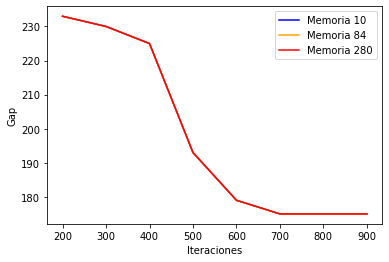

In [6]:
df_variacion_mem_10_v10_TSC_AGM = df_resultados_tbc[(df_resultados_tbc["metodo"]=="TSC-AGM") & (df_resultados_tbc["caso"]=="memoria-28-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_10_v10_TSC_AGM[df_variacion_mem_10_v10_TSC_AGM["iteraciones"] > 100], x='iteraciones', y='gap',  color='blue',palette = 'bright', label='Memoria 10');

df_variacion_mem_30_v10_TSC_AGM = df_resultados_tbc[(df_resultados_tbc["metodo"]=="TSC-AGM") & (df_resultados_tbc["caso"]=="memoria-84-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_30_v10_TSC_AGM[df_variacion_mem_30_v10_TSC_AGM["iteraciones"] > 100], x='iteraciones', y='gap', color='orange',palette = 'bright', label='Memoria 84');

df_variacion_mem_280_v10_TSC_AGM = df_resultados_tbc[(df_resultados_tbc["metodo"]=="TSC-AGM") & (df_resultados_tbc["caso"]=="memoria-280-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_280_v10_TSC_AGM[df_variacion_mem_280_v10_TSC_AGM["iteraciones"] > 100], x='iteraciones', y='gap', color='red',palette = 'bright', label='Memoria 280');

fig.set(xlabel='Iteraciones', ylabel='Gap');
plt.savefig("graficos/tbc-agm-mem-v10.svg");

Grafico TSC-AGM tomando un 10% de la vencindad y un tamaño de memoria de 10%, 30%, 100% y un máximo de 1000 iteraciones

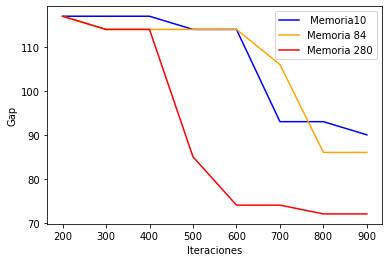

In [7]:
df_variacion_mem_10_v20_TSC_AGM = df_resultados_tbc[(df_resultados_tbc["metodo"]=="TSC-AGM") & (df_resultados_tbc["caso"]=="memoria-28-vecinos-20")].copy();
fig = sns.lineplot(data=df_variacion_mem_10_v20_TSC_AGM[df_variacion_mem_10_v20_TSC_AGM["iteraciones"] > 100], x='iteraciones', y='gap',palette = 'bright',  color='blue', label=' Memoria10');

df_variacion_mem_30_v20_TSC_AGM = df_resultados_tbc[(df_resultados_tbc["metodo"]=="TSC-AGM") & (df_resultados_tbc["caso"]=="memoria-84-vecinos-20")].copy();
fig = sns.lineplot(data=df_variacion_mem_30_v20_TSC_AGM[df_variacion_mem_30_v20_TSC_AGM["iteraciones"] > 100], x='iteraciones', y='gap',palette = 'bright', color='orange', label='Memoria 84');

df_variacion_mem_280_v20_TSC_AGM = df_resultados_tbc[(df_resultados_tbc["metodo"]=="TSC-AGM") & (df_resultados_tbc["caso"]=="memoria-280-vecinos-20")].copy();
fig = sns.lineplot(data=df_variacion_mem_280_v20_TSC_AGM[df_variacion_mem_280_v20_TSC_AGM["iteraciones"] > 100], x='iteraciones', y='gap',palette = 'bright', color='red', label='Memoria 280');

fig.set(xlabel='Iteraciones', ylabel='Gap');
plt.savefig("graficos/tbc-agm-mem-v20.svg");

Grafico TSE-AGM tomando un 10% de la vencindad y un tamaño de memoria de 10%, 30%, 100% y un máximo de 1000 iteraciones

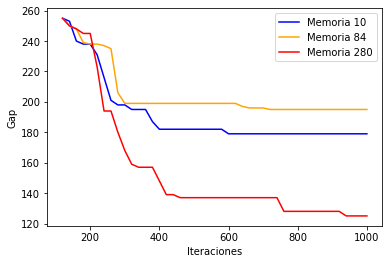

In [8]:
df_variacion_mem_10_v10_TSE_AGM = df_resultados_tbe[(df_resultados_tbe["metodo"]=="TSE-AGM") & (df_resultados_tbe["caso"]=="memoria-28-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_10_v10_TSE_AGM[df_variacion_mem_10_v10_TSE_AGM["iteraciones"] > 100], x='iteraciones', y='gap',  color='blue',palette = 'bright', label='Memoria 10');

df_variacion_mem_30_v10_TSE_AGM = df_resultados_tbe[(df_resultados_tbe["metodo"]=="TSE-AGM") & (df_resultados_tbe["caso"]=="memoria-84-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_30_v10_TSE_AGM[df_variacion_mem_30_v10_TSE_AGM["iteraciones"] > 100], x='iteraciones', y='gap', color='orange',palette = 'bright', label='Memoria 84');

df_variacion_mem_280_v10_TSE_AGM = df_resultados_tbe[(df_resultados_tbe["metodo"]=="TSE-AGM") & (df_resultados_tbe["caso"]=="memoria-280-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_280_v10_TSE_AGM[df_variacion_mem_280_v10_TSE_AGM["iteraciones"] > 100], x='iteraciones', y='gap', color='red',palette = 'bright', label='Memoria 280');

fig.set(xlabel='Iteraciones', ylabel='Gap');
plt.savefig("graficos/tse-agm-mem-v10.svg");

Grafico TSE-AGM tomando un 20% de la vencindad y un tamaño de memoria de 10%, 30%, 100% y un máximo de 1000 iteraciones

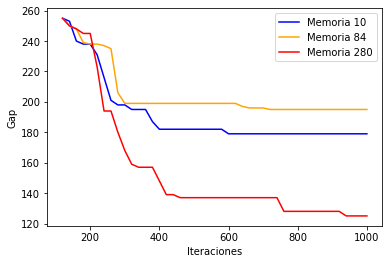

In [9]:
df_variacion_mem_10_v20_TSE_AGM = df_resultados_tbe[(df_resultados_tbe["metodo"]=="TSE-AGM") & (df_resultados_tbe["caso"]=="memoria-28-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_10_v20_TSE_AGM[df_variacion_mem_10_v20_TSE_AGM["iteraciones"] > 100], x='iteraciones', y='gap',  color='blue',palette = 'bright', label='Memoria 10');

df_variacion_mem_30_v20_TSE_AGM = df_resultados_tbe[(df_resultados_tbe["metodo"]=="TSE-AGM") & (df_resultados_tbe["caso"]=="memoria-84-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_30_v20_TSE_AGM[df_variacion_mem_30_v20_TSE_AGM["iteraciones"] > 100], x='iteraciones', y='gap', color='orange',palette = 'bright', label='Memoria 84');

df_variacion_mem_280_v20_TSE_AGM = df_resultados_tbe[(df_resultados_tbe["metodo"]=="TSE-AGM") & (df_resultados_tbe["caso"]=="memoria-280-vecinos-10")].copy();
fig = sns.lineplot(data=df_variacion_mem_280_v20_TSE_AGM[df_variacion_mem_280_v20_TSE_AGM["iteraciones"] > 100], x='iteraciones', y='gap', color='red',palette = 'bright', label='Memoria 280');

fig.set(xlabel='Iteraciones', ylabel='Gap');
plt.savefig("graficos/tse-agm-mem-v20.svg");

# Comparativa Gap
Comparamos el Gap relativo obtenido por todos los metodos para las siguientes entradas:
.burma14, bayg29, att48, berlin52, eil76, gr96, df_bier127, a280

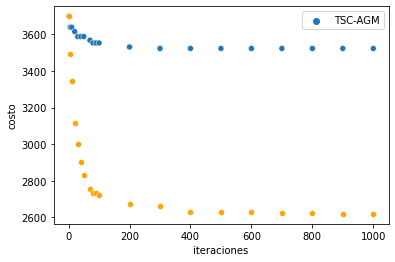

In [40]:
#df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
df_variacion_iteraciones_TSC_AGM = df_resultados[(df_resultados["metodo"]=="TSC-AGM") & (df_resultados["caso"]=="variando-iteraciones")].copy();
fig = sns.scatterplot(data=df_variacion_iteraciones_TSC_AGM, x='iteraciones', y='costo', hue='metodo');

df_variacion_iteraciones_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") & (df_resultados["caso"]=="variando-iteraciones")].copy();
fig = sns.scatterplot(data=df_variacion_iteraciones_TSE_AGM, x='iteraciones', y='costo', color='orange' );

#fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/fb-densidades.svg");

#### TSE-AGM variando iteraciones

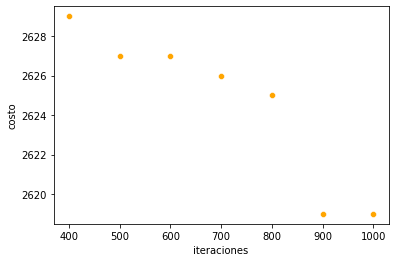

In [49]:
df_variacion_iteraciones_TSE_AGM = df_resultados[(df_resultados["metodo"]=="TSE-AGM") &
                                                 (df_resultados["caso"]=="variando-iteraciones")].copy();
fig = sns.scatterplot(data=df_variacion_iteraciones_TSE_AGM[(df_variacion_iteraciones_TSE_AGM["costo"] < 2640) & (df_variacion_iteraciones_TSE_AGM["costo"] > 2600)], x='iteraciones', y='costo', color='orange' );


## Experimento 2: Comparacion Calidad

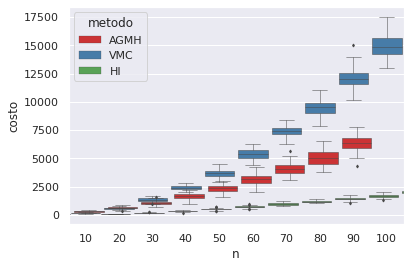

In [183]:
df_resultados = pd.read_csv("resultados/resultado-comparacion-calidad-2.csv");
sns.set(style="darkgrid")
sns.boxplot(x="n", y="costo", hue="metodo", data=df_resultados, palette="Set1", width=2.7,orient="v",fliersize=2,linewidth=0.5)
plt.show()


## Experimento 3: Comparacion Tiempo

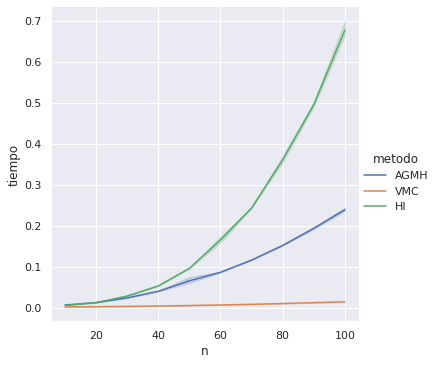

In [189]:

sns.relplot(data=df_resultados,x="n", y="tiempo",hue="metodo",kind="line")
plt.show()

## Experimento 3: Comparacion Tiempo vs Calidad

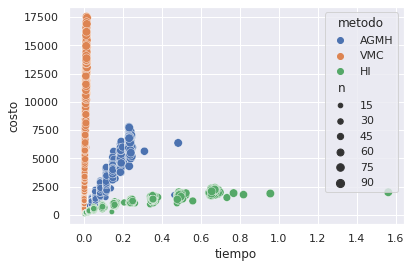

In [202]:
df_fijo = df_resultados[(df_resultados["n"]==50)].copy();
sns.scatterplot(data=df_resultados, x="tiempo", y="costo", hue="metodo",size="n")
plt.show()

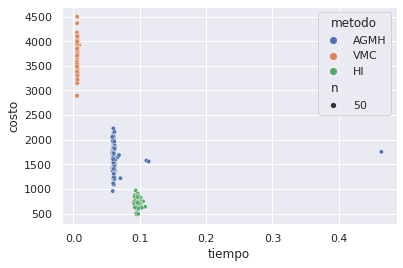

In [204]:
df_fijo = df_resultados[(df_resultados["n"]==50)].copy();
sns.scatterplot(data=df_fijo, x="tiempo", y="costo", hue="metodo",size="n")
plt.show()

### Ejemplo para tabusearch

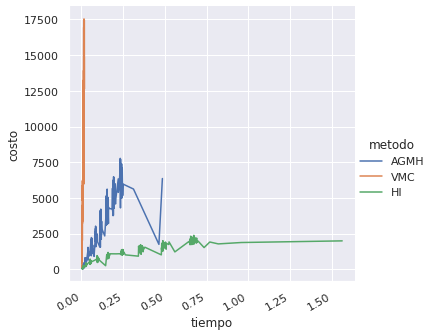

In [211]:
g = sns.relplot(x="tiempo", y="costo",hue="metodo" ,kind="line", data=df_resultados)
g.fig.autofmt_xdate()